In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


%load_ext tensorboard

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import datetime
import os
import copy

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_labels = None
train_images = None
test_labels = None
test_images = None
class_names = None
history = None

In [3]:
def processDataset():
    global train_labels
    global train_images
    global test_labels
    global test_images
    global class_names
    
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
    
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
print(train_labels)
processDataset()
print(train_labels)


None
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


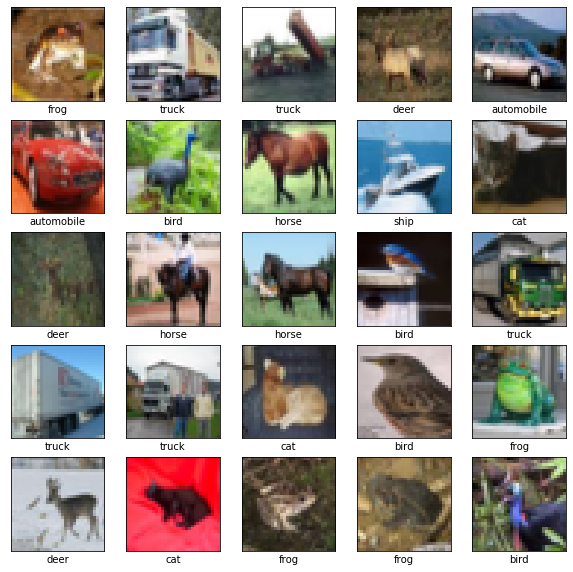

In [4]:
def showDataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    
showDataset()

In [5]:
def evaluateModel(model):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('Acc: ' + str(test_acc))
    print('Loss:' + str(test_loss))

In [6]:
def showPredictions(model):
    probability_model = keras.Sequential([model, keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    
    
    
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()


    
    
    
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')


In [7]:
def showLoss():
    plt.figure(2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 2])
    plt.legend(loc='lower right')

In [8]:
def showAccuracy():
    plt.figure(1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

In [9]:
def trainModelAdam(model, epochCount):
    global history
    
    model.summary()
    
    log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    %tensorboard --logdir logs/fit
    #model.build()
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    
    

In [10]:
def trainModelAdamax(model, epochCount):
    global history
    
    model.summary()
    
    log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    %tensorboard --logdir logs/fit
    #model.build()
    
    model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    

# Define generic models
model_1_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

model_1_tanh = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])


# model 2 = model 1 with batch normalisation added between conv and activation, as shown in slides
model_2_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

model_2_tanh = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])


#model 3 is model 1 with dropout added after maxPooling and before end, as shown in 
#https://keras.io/examples/cifar10_cnn/ **
#https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
model_3_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

model_3_tanh = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

#control is model 1 but only the fully connected dense layers as control
control_relu = keras.Sequential([
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

control_tanh = keras.Sequential([
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

M1AdamRelu = model_1_relu
M1AdamTanH = model_1_tanh
M1AdamaxRelu = model_1_relu
M1AdamaxTanH = model_1_tanh

M2AdamRelu = model_2_relu
M2AdamTanH = model_2_tanh
M2AdamaxRelu = model_2_relu
M2AdamaxTanH = model_2_tanh

M3AdamRelu = model_3_relu
M3AdamTanH = model_3_tanh
M3AdamaxRelu = model_3_relu
M3AdamaxTanH = model_3_tanh

CAdamRelu = control_relu
CAdamTanH = control_tanh
CAdamaxRelu = control_relu
CAdamaxTanH = control_tanh

## Model 1
### Adam

In [12]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

'kill' is not recognized as an internal or external command,
operable program or batch file.


Reusing TensorBoard on port 6006 (pid 1164), started 0:55:23 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 217us/sample - loss: 1.5561 - accuracy: 0.4283 - val_loss: 1.3637 - val_accuracy: 0.4992
Epoch 2/50
50000/50000 [==============================] - 10s 192us/sample - loss: 1.1647 - accuracy: 0.5874 - val_loss: 1.0932 - val_accuracy: 0.6112
Epoch 3/50
50000/50000 [==============================] - 10s 192us/sample - loss: 1.0241 - accuracy: 0.6397 - val_loss: 0.9842 - val_accuracy: 0.6581
Epoch 4/50
45952/50000 [==========================>...] - ETA: 0s - loss: 0.9260 - accuracy: 0.6747

KeyboardInterrupt: 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

Reusing TensorBoard on port 6006 (pid 13728), started 0:12:58 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 239us/sample - loss: 1.4171 - accuracy: 0.4979 - val_loss: 1.2095 - val_accuracy: 0.5770
Epoch 2/50
50000/50000 [==============================] - 11s 225us/sample - loss: 1.1321 - accuracy: 0.6016 - val_loss: 1.0912 - val_accuracy: 0.6216
Epoch 3/50
50000/50000 [==============================] - 11s 221us/sample - loss: 1.0242 - accuracy: 0.6407 - val_loss: 1.1076 - val_accuracy: 0.6166
Epoch 4/50
50000/50000 [==============================] - 11s 214us/sample - loss: 0.9561 - accuracy: 0.6678 - val_loss: 1.0378 - val_accuracy: 0.6471
Epoch 5/50
50000/50000 [==============================] - 10s 195us/sample - loss: 0.9011 - accuracy: 0.6880 - val_loss: 1.0323 - val_accuracy: 0.6384
Epoch 6/50
50000/50000 [==============================] - 11s 216us/sample - loss: 0.8563 - accuracy: 0.7010 - val_loss: 1.0028 - val_accuracy: 0.6534
Epoch 7/50
50000/50000 [====================

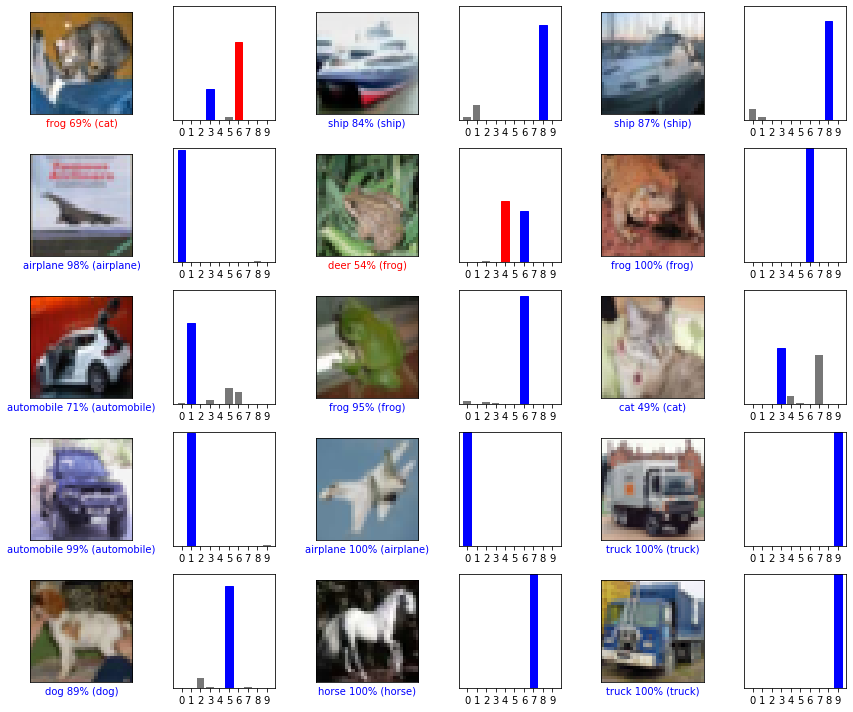

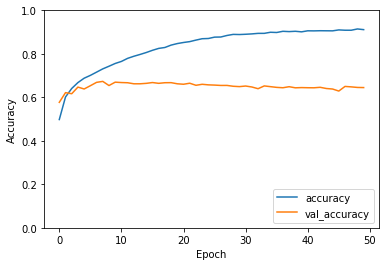

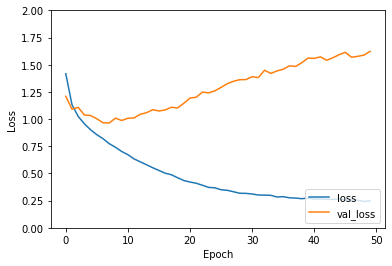

In [12]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 50)

### Adamax

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

Reusing TensorBoard on port 6006 (pid 13728), started 0:21:14 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 214us/sample - loss: 1.6316 - accuracy: 0.4080 - val_loss: 1.4058 - val_accuracy: 0.4893
Epoch 2/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.3213 - accuracy: 0.5257 - val_loss: 1.2630 - val_accuracy: 0.5506
Epoch 3/50
50000/50000 [==============================] - 10s 197us/sample - loss: 1.1726 - accuracy: 0.5853 - val_loss: 1.1355 - val_accuracy: 0.5990
Epoch 4/50
50000/50000 [==============================] - 10s 199us/sample - loss: 1.0664 - accuracy: 0.6241 - val_loss: 1.0378 - val_accuracy: 0.6359
Epoch 5/50
50000/50000 [==============================] - 10s 198us/sample - loss: 0.9851 - accuracy: 0.6537 - val_loss: 0.9885 - val_accuracy: 0.6553
Epoch 6/50
50000/50000 [==============================] - 10s 195us/sample - loss: 0.9264 - accuracy: 0.6777 - val_loss: 0.9263 - val_accuracy: 0.6751
Epoch 7/50
50000/50000 [====================

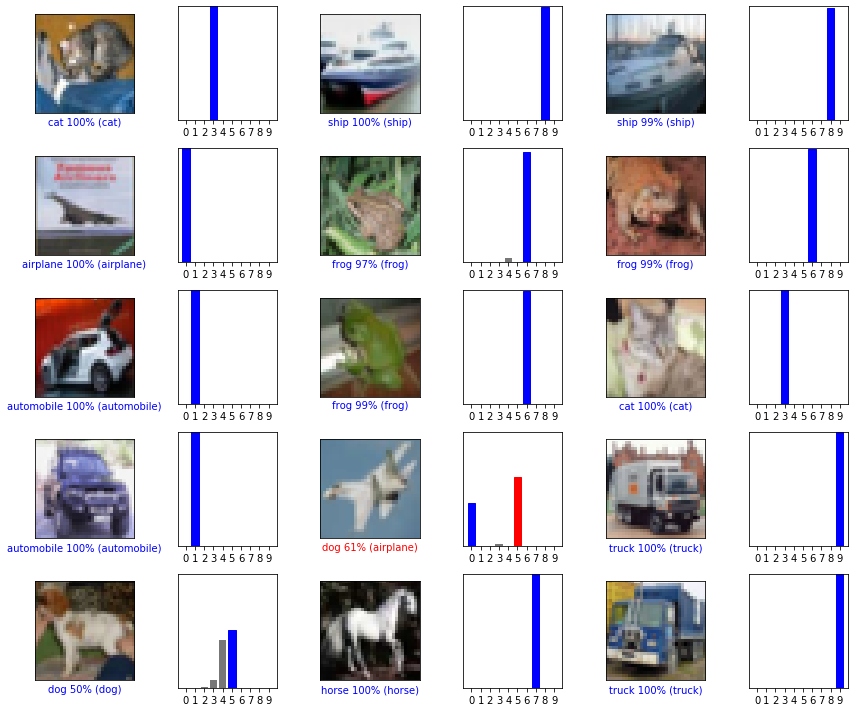

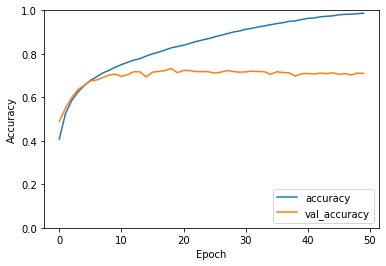

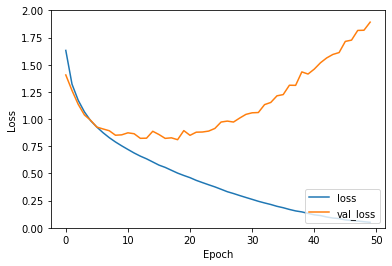

In [13]:
testModel3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 50)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)         

Reusing TensorBoard on port 6006 (pid 13728), started 0:29:32 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 215us/sample - loss: 1.5356 - accuracy: 0.4577 - val_loss: 1.3518 - val_accuracy: 0.5243
Epoch 2/50
50000/50000 [==============================] - 10s 199us/sample - loss: 1.2283 - accuracy: 0.5698 - val_loss: 1.1727 - val_accuracy: 0.5925
Epoch 3/50
50000/50000 [==============================] - 10s 203us/sample - loss: 1.1035 - accuracy: 0.6147 - val_loss: 1.0808 - val_accuracy: 0.6256
Epoch 4/50
50000/50000 [==============================] - 10s 194us/sample - loss: 1.0330 - accuracy: 0.6411 - val_loss: 1.0306 - val_accuracy: 0.6465
Epoch 5/50
50000/50000 [==============================] - 10s 195us/sample - loss: 0.9740 - accuracy: 0.6630 - val_loss: 1.0117 - val_accuracy: 0.6514
Epoch 6/50
50000/50000 [==============================] - 11s 223us/sample - loss: 0.9236 - accuracy: 0.6789 - val_loss: 0.9779 - val_accuracy: 0.6624
Epoch 7/50
50000/50000 [====================

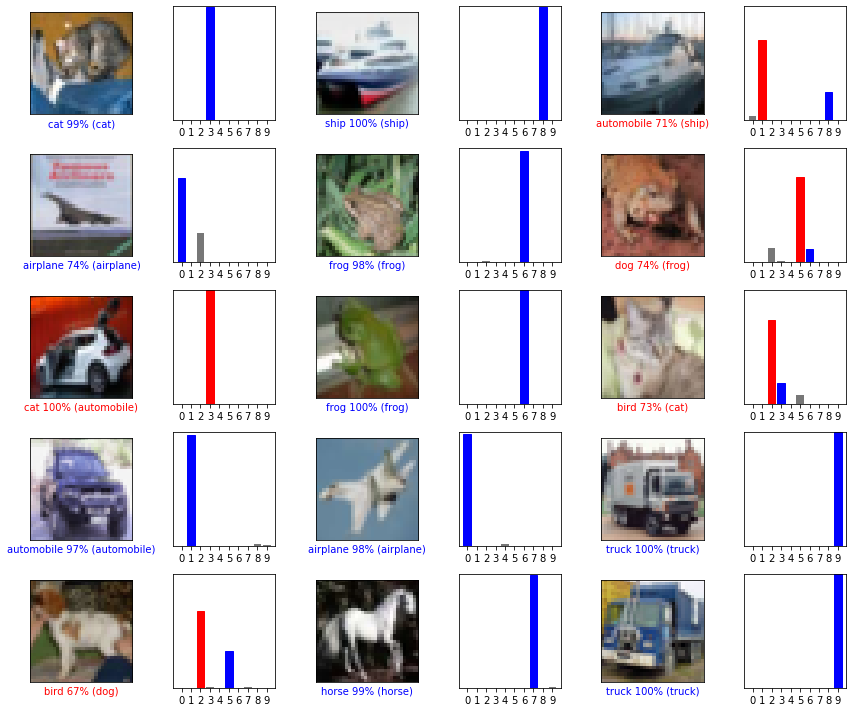

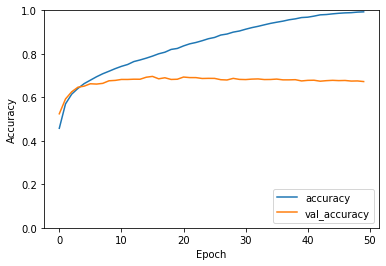

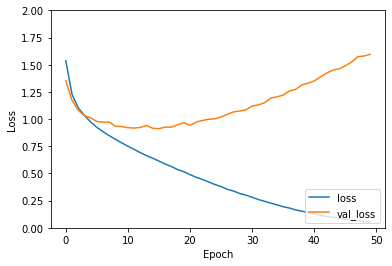

In [14]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 50)

## Model 2
### Adam

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_17 (Activation)   (None, 13, 13, 64)       

Reusing TensorBoard on port 6006 (pid 13728), started 0:37:53 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 239us/sample - loss: 1.2896 - accuracy: 0.5390 - val_loss: 1.3552 - val_accuracy: 0.5359
Epoch 2/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.9360 - accuracy: 0.6725 - val_loss: 0.9608 - val_accuracy: 0.6687
Epoch 3/50
50000/50000 [==============================] - 11s 222us/sample - loss: 0.7990 - accuracy: 0.7203 - val_loss: 1.0655 - val_accuracy: 0.6377
Epoch 4/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.7082 - accuracy: 0.7522 - val_loss: 1.6139 - val_accuracy: 0.5226
Epoch 5/50
50000/50000 [==============================] - 11s 217us/sample - loss: 0.6370 - accuracy: 0.7778 - val_loss: 1.0022 - val_accuracy: 0.6793
Epoch 6/50
50000/50000 [==============================] - 11s 219us/sample - loss: 0.5779 - accuracy: 0.7978 - val_loss: 1.0246 - val_accuracy: 0.6797
Epoch 7/50
50000/50000 [====================

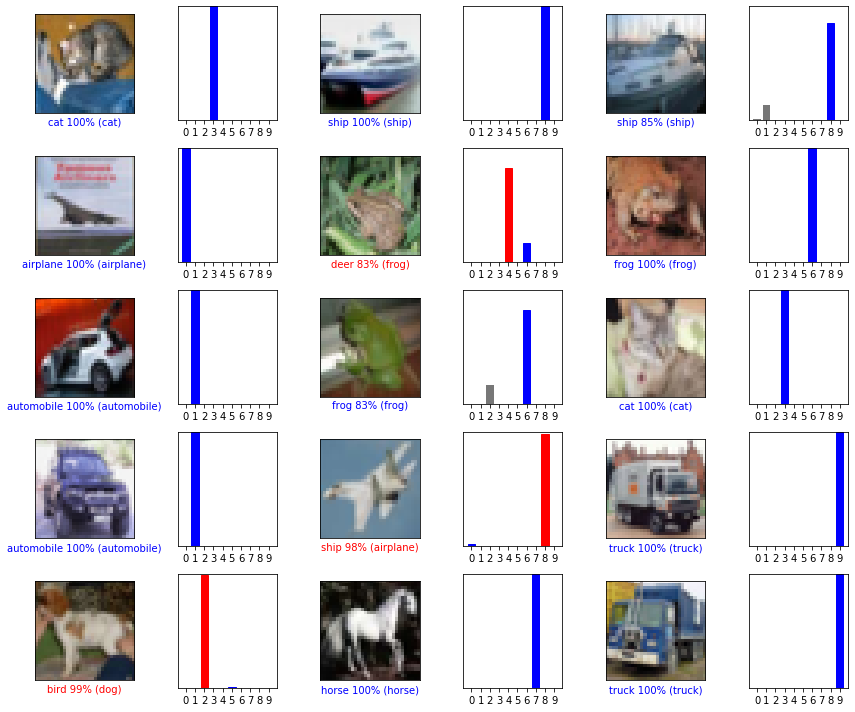

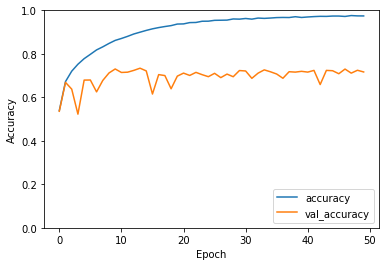

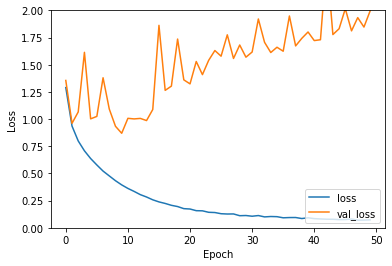

In [15]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 50)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 0:47:10 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 237us/sample - loss: 1.4111 - accuracy: 0.5021 - val_loss: 1.3853 - val_accuracy: 0.5157
Epoch 2/50
50000/50000 [==============================] - 12s 230us/sample - loss: 1.1029 - accuracy: 0.6149 - val_loss: 1.2787 - val_accuracy: 0.5556
Epoch 3/50
50000/50000 [==============================] - 11s 219us/sample - loss: 0.9818 - accuracy: 0.6553 - val_loss: 1.1991 - val_accuracy: 0.5735
Epoch 4/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.9070 - accuracy: 0.6831 - val_loss: 1.0555 - val_accuracy: 0.6349
Epoch 5/50
50000/50000 [==============================] - 11s 219us/sample - loss: 0.8517 - accuracy: 0.7029 - val_loss: 1.0541 - val_accuracy: 0.6393
Epoch 6/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.7961 - accuracy: 0.7227 - val_loss: 1.0715 - val_accuracy: 0.6313
Epoch 7/50
50000/50000 [====================

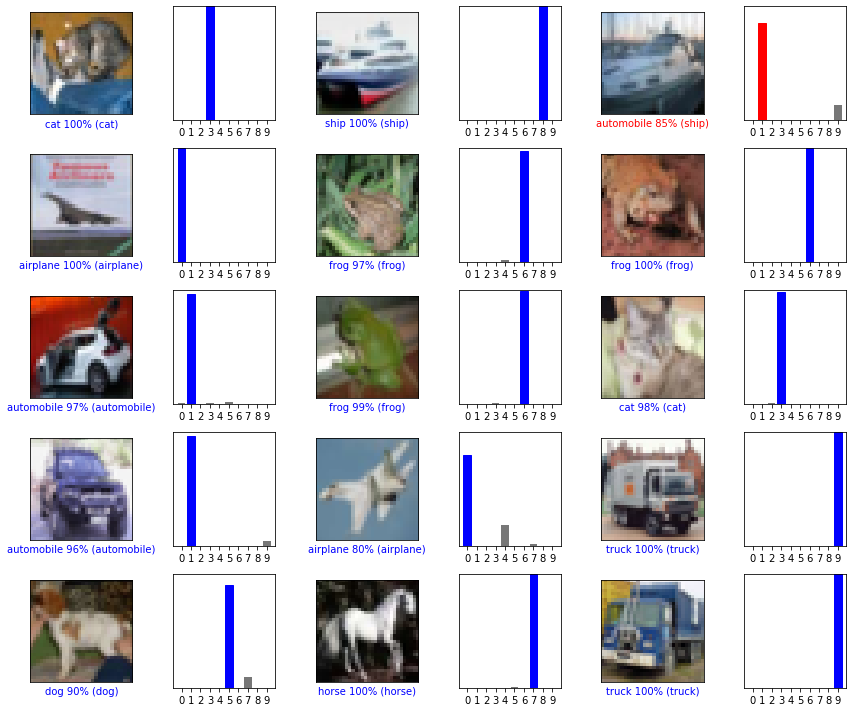

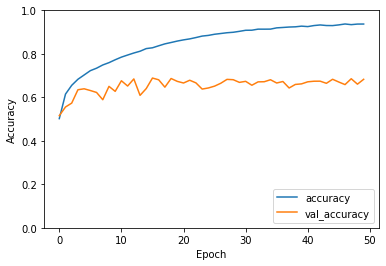

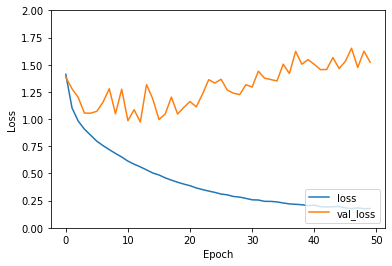

In [16]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 50)

### Adamax

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_24 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_25 (Activation)   (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 0:56:32 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 235us/sample - loss: 1.3229 - accuracy: 0.5281 - val_loss: 1.2268 - val_accuracy: 0.5637
Epoch 2/50
50000/50000 [==============================] - 11s 219us/sample - loss: 0.9775 - accuracy: 0.6562 - val_loss: 1.0814 - val_accuracy: 0.6241
Epoch 3/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.8388 - accuracy: 0.7086 - val_loss: 0.9631 - val_accuracy: 0.6682
Epoch 4/50
50000/50000 [==============================] - 11s 216us/sample - loss: 0.7455 - accuracy: 0.7403 - val_loss: 1.0389 - val_accuracy: 0.6434
Epoch 5/50
50000/50000 [==============================] - 11s 218us/sample - loss: 0.6769 - accuracy: 0.7632 - val_loss: 0.9450 - val_accuracy: 0.6771
Epoch 6/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.6212 - accuracy: 0.7829 - val_loss: 0.8542 - val_accuracy: 0.7091
Epoch 7/50
50000/50000 [====================

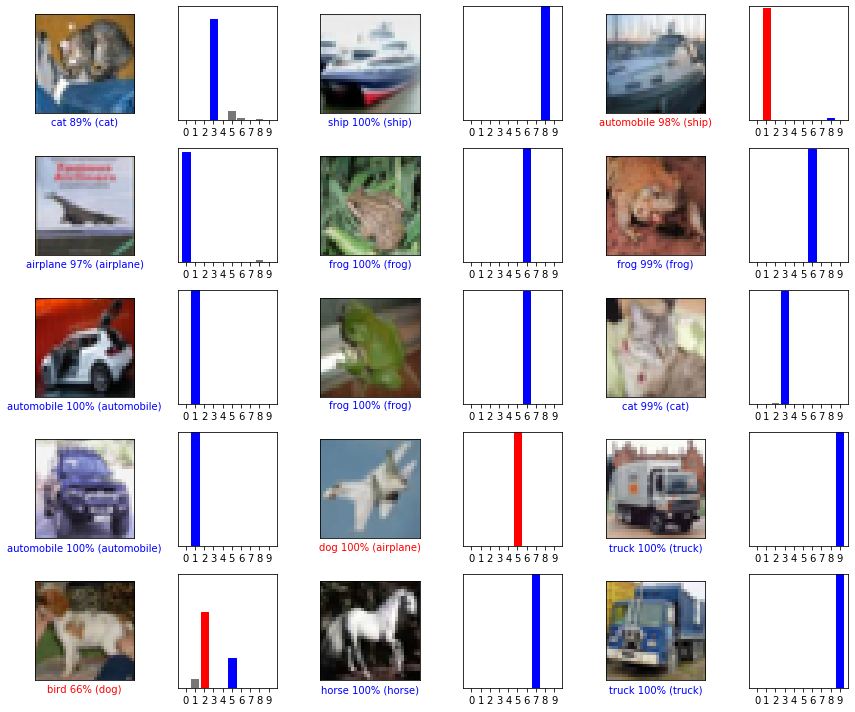

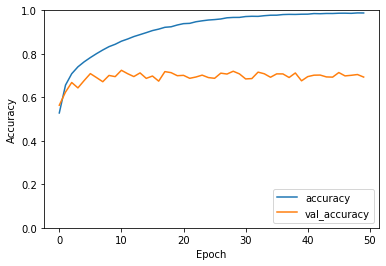

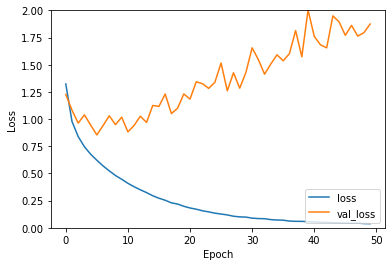

In [17]:
testModel3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 50)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
activation_29 (Activation)   (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 1:05:46 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 239us/sample - loss: 1.4136 - accuracy: 0.5029 - val_loss: 1.4239 - val_accuracy: 0.5025
Epoch 2/50
50000/50000 [==============================] - 11s 221us/sample - loss: 1.1056 - accuracy: 0.6158 - val_loss: 1.1240 - val_accuracy: 0.6072
Epoch 3/50
50000/50000 [==============================] - 11s 217us/sample - loss: 0.9813 - accuracy: 0.6602 - val_loss: 1.0884 - val_accuracy: 0.6235
Epoch 4/50
50000/50000 [==============================] - 11s 225us/sample - loss: 0.8946 - accuracy: 0.6901 - val_loss: 1.0803 - val_accuracy: 0.6189
Epoch 5/50
50000/50000 [==============================] - 11s 217us/sample - loss: 0.8332 - accuracy: 0.7127 - val_loss: 1.0542 - val_accuracy: 0.6401
Epoch 6/50
50000/50000 [==============================] - 11s 220us/sample - loss: 0.7714 - accuracy: 0.7332 - val_loss: 1.1249 - val_accuracy: 0.6242
Epoch 7/50
50000/50000 [====================

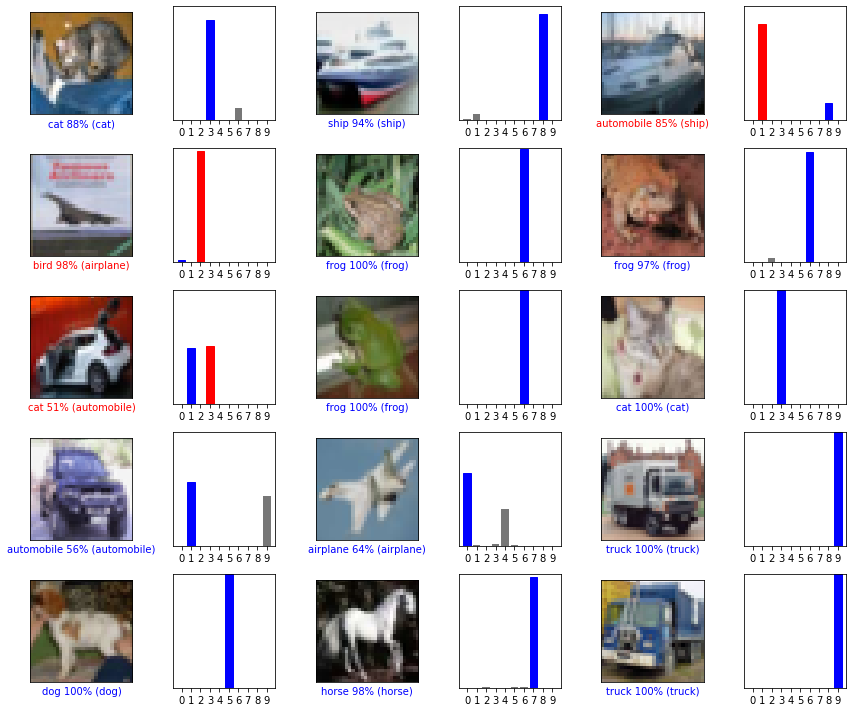

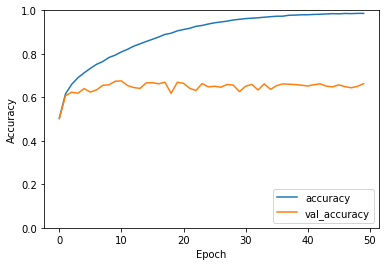

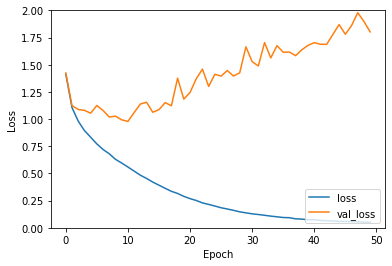

In [18]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 50)

## Model 3
### Adam

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_32 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_33 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)        

Reusing TensorBoard on port 6006 (pid 13728), started 1:15:02 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 237us/sample - loss: 1.7975 - accuracy: 0.3231 - val_loss: 1.4261 - val_accuracy: 0.4754
Epoch 2/50
50000/50000 [==============================] - 10s 203us/sample - loss: 1.4812 - accuracy: 0.4636 - val_loss: 1.2554 - val_accuracy: 0.5572
Epoch 3/50
50000/50000 [==============================] - 10s 206us/sample - loss: 1.3510 - accuracy: 0.5190 - val_loss: 1.1555 - val_accuracy: 0.5847
Epoch 4/50
50000/50000 [==============================] - 10s 204us/sample - loss: 1.2765 - accuracy: 0.5488 - val_loss: 1.0667 - val_accuracy: 0.6239
Epoch 5/50
50000/50000 [==============================] - 10s 201us/sample - loss: 1.2104 - accuracy: 0.5724 - val_loss: 1.0385 - val_accuracy: 0.6377
Epoch 6/50
50000/50000 [==============================] - 10s 204us/sample - loss: 1.1661 - accuracy: 0.5923 - val_loss: 0.9970 - val_accuracy: 0.6533
Epoch 7/50
50000/50000 [====================

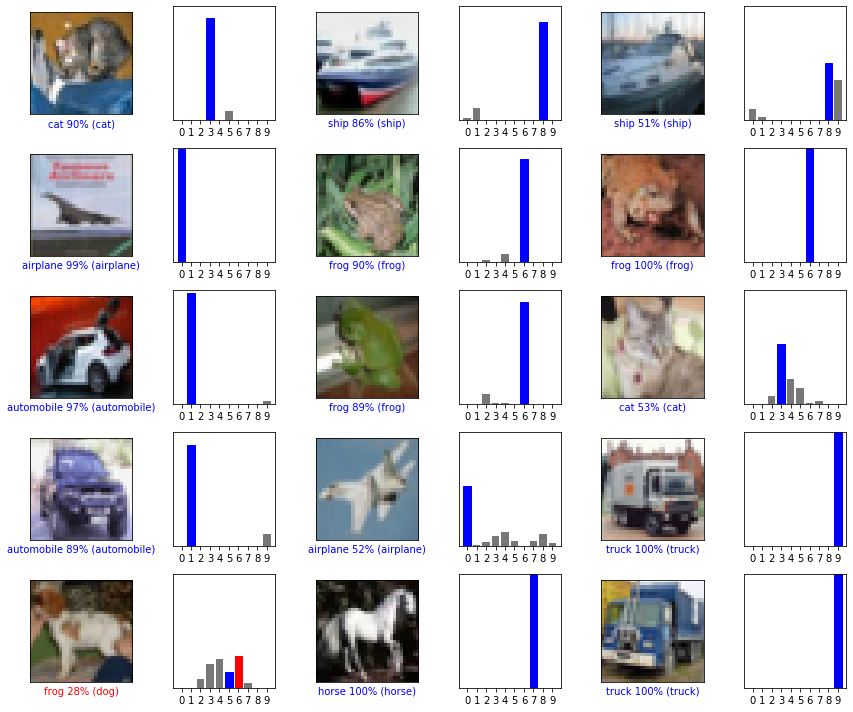

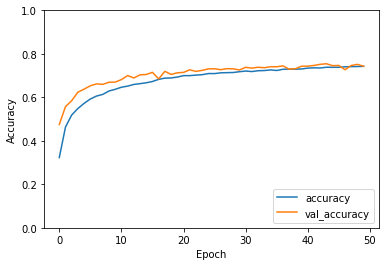

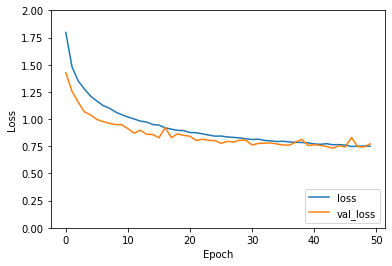

In [19]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 50)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_37 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)        

Reusing TensorBoard on port 6006 (pid 13728), started 1:23:36 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 219us/sample - loss: 1.6039 - accuracy: 0.4288 - val_loss: 1.2919 - val_accuracy: 0.5486
Epoch 2/50
50000/50000 [==============================] - 10s 205us/sample - loss: 1.3703 - accuracy: 0.5193 - val_loss: 1.2042 - val_accuracy: 0.5755
Epoch 3/50
50000/50000 [==============================] - 10s 207us/sample - loss: 1.2995 - accuracy: 0.5467 - val_loss: 1.1223 - val_accuracy: 0.6106
Epoch 4/50
50000/50000 [==============================] - 10s 203us/sample - loss: 1.2634 - accuracy: 0.5611 - val_loss: 1.1943 - val_accuracy: 0.5911
Epoch 5/50
50000/50000 [==============================] - 10s 204us/sample - loss: 1.2410 - accuracy: 0.5695 - val_loss: 1.1059 - val_accuracy: 0.6162
Epoch 6/50
50000/50000 [==============================] - 10s 205us/sample - loss: 1.2161 - accuracy: 0.5790 - val_loss: 1.1225 - val_accuracy: 0.6062
Epoch 7/50
50000/50000 [====================

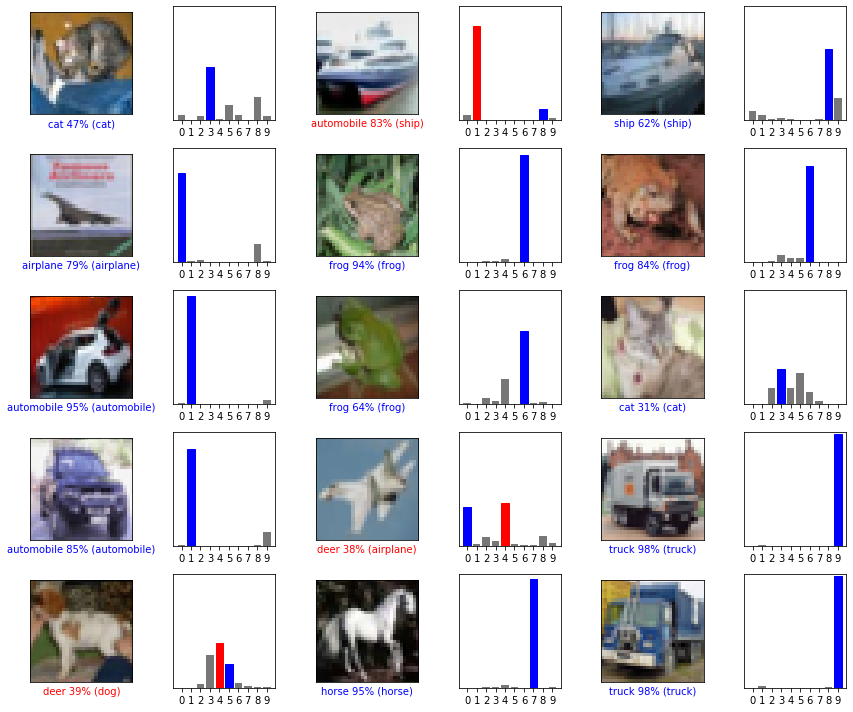

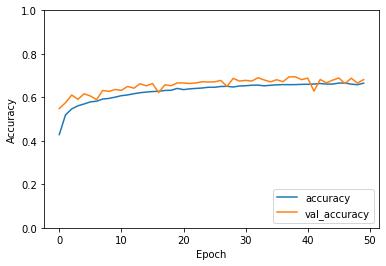

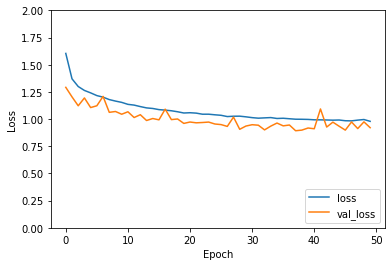

In [20]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])
trainModelAdam(testModel2, 50)

### Adamax

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_40 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_41 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 64)        

Reusing TensorBoard on port 6006 (pid 13728), started 1:32:13 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 220us/sample - loss: 1.9987 - accuracy: 0.2539 - val_loss: 1.6868 - val_accuracy: 0.4026
Epoch 2/50
50000/50000 [==============================] - 11s 212us/sample - loss: 1.6546 - accuracy: 0.3926 - val_loss: 1.4502 - val_accuracy: 0.4873
Epoch 3/50
50000/50000 [==============================] - 10s 208us/sample - loss: 1.5076 - accuracy: 0.4530 - val_loss: 1.3241 - val_accuracy: 0.5341
Epoch 4/50
50000/50000 [==============================] - 10s 205us/sample - loss: 1.4125 - accuracy: 0.4937 - val_loss: 1.2201 - val_accuracy: 0.5599
Epoch 5/50
50000/50000 [==============================] - 11s 211us/sample - loss: 1.3332 - accuracy: 0.5260 - val_loss: 1.1651 - val_accuracy: 0.5894
Epoch 6/50
50000/50000 [==============================] - 10s 207us/sample - loss: 1.2777 - accuracy: 0.5498 - val_loss: 1.1397 - val_accuracy: 0.5964
Epoch 7/50
50000/50000 [====================

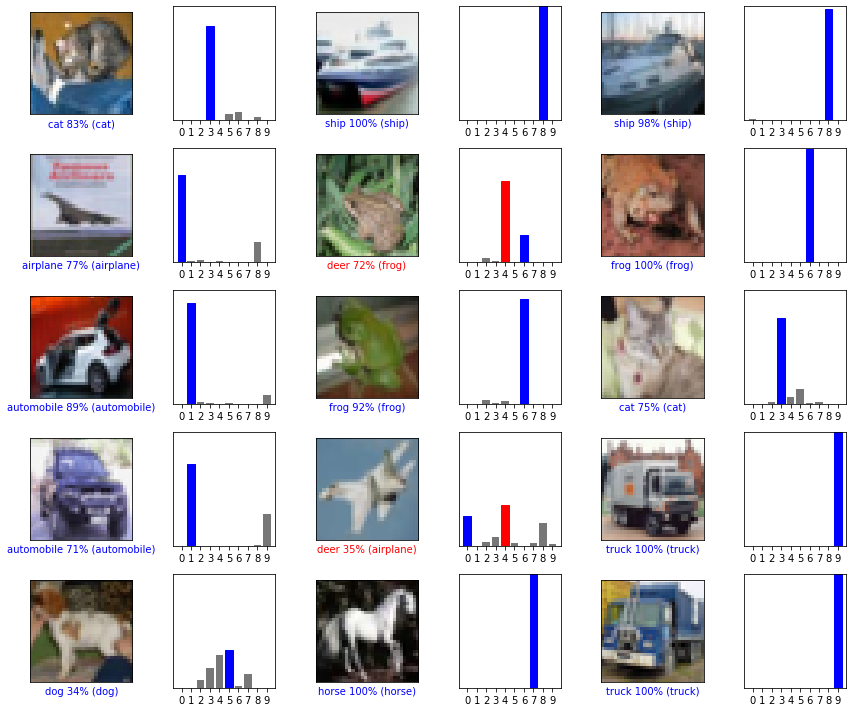

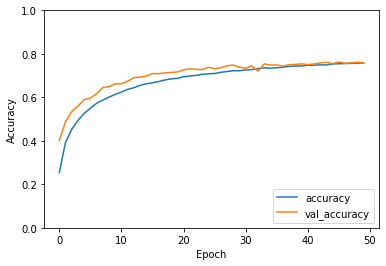

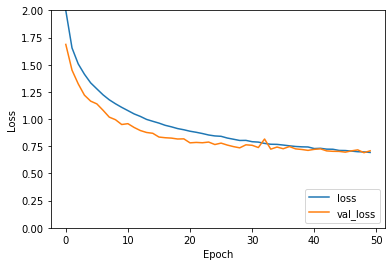

In [21]:
testModel3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 50)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_44 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)        

Reusing TensorBoard on port 6006 (pid 13728), started 1:41:00 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 224us/sample - loss: 1.7268 - accuracy: 0.3766 - val_loss: 1.4705 - val_accuracy: 0.4680
Epoch 2/50
50000/50000 [==============================] - 11s 211us/sample - loss: 1.4455 - accuracy: 0.4874 - val_loss: 1.3674 - val_accuracy: 0.5092
Epoch 3/50
50000/50000 [==============================] - 11s 214us/sample - loss: 1.3380 - accuracy: 0.5318 - val_loss: 1.3199 - val_accuracy: 0.5233
Epoch 4/50
50000/50000 [==============================] - 10s 209us/sample - loss: 1.2815 - accuracy: 0.5558 - val_loss: 1.1759 - val_accuracy: 0.5858
Epoch 5/50
50000/50000 [==============================] - 10s 207us/sample - loss: 1.2416 - accuracy: 0.5687 - val_loss: 1.1476 - val_accuracy: 0.6077
Epoch 6/50
50000/50000 [==============================] - 10s 210us/sample - loss: 1.2157 - accuracy: 0.5773 - val_loss: 1.1152 - val_accuracy: 0.6136
Epoch 7/50
50000/50000 [====================

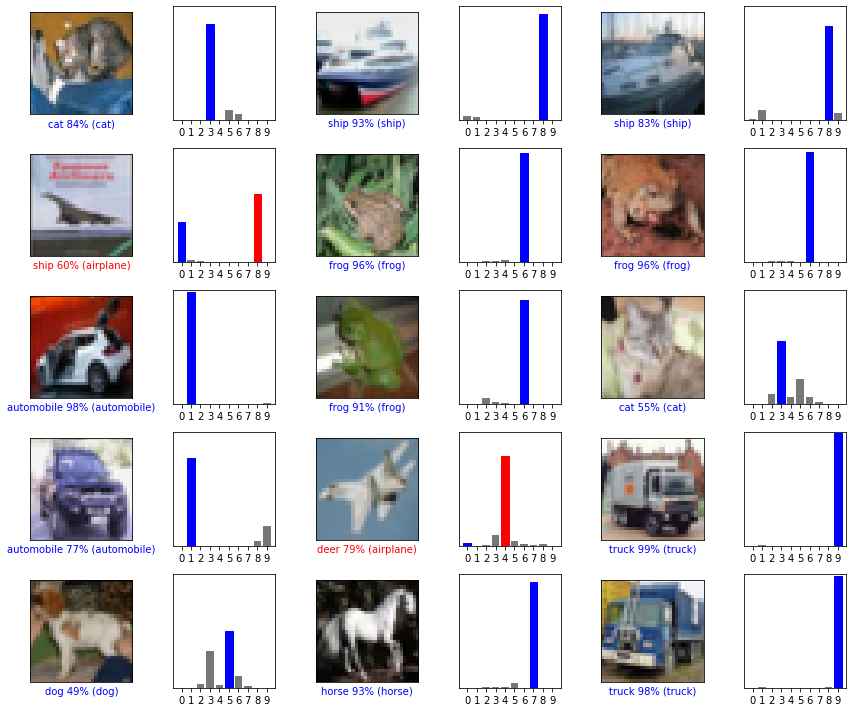

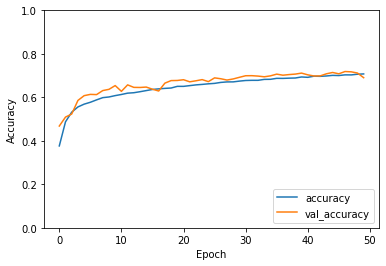

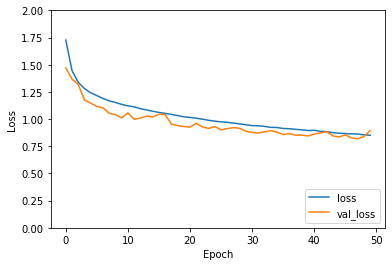

In [22]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])
trainModelAdamax(testModel4, 50)

## Control
### Adam

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                196672    
_________________________________________________________________
activation_48 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


Reusing TensorBoard on port 6006 (pid 13728), started 1:49:47 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 269us/sample - loss: 1.9407 - accuracy: 0.2963 - val_loss: 1.8294 - val_accuracy: 0.3392
Epoch 2/50
50000/50000 [==============================] - 7s 131us/sample - loss: 1.8155 - accuracy: 0.3466 - val_loss: 1.7945 - val_accuracy: 0.3599
Epoch 3/50
50000/50000 [==============================] - 7s 138us/sample - loss: 1.7865 - accuracy: 0.3612 - val_loss: 1.8018 - val_accuracy: 0.3444
Epoch 4/50
50000/50000 [==============================] - 7s 133us/sample - loss: 1.7671 - accuracy: 0.3687 - val_loss: 1.7709 - val_accuracy: 0.3636
Epoch 5/50
50000/50000 [==============================] - 7s 133us/sample - loss: 1.7528 - accuracy: 0.3763 - val_loss: 1.7402 - val_accuracy: 0.3792
Epoch 6/50
50000/50000 [==============================] - 7s 136us/sample - loss: 1.7430 - accuracy: 0.3817 - val_loss: 1.7240 - val_accuracy: 0.3850
Epoch 7/50
50000/50000 [=========================

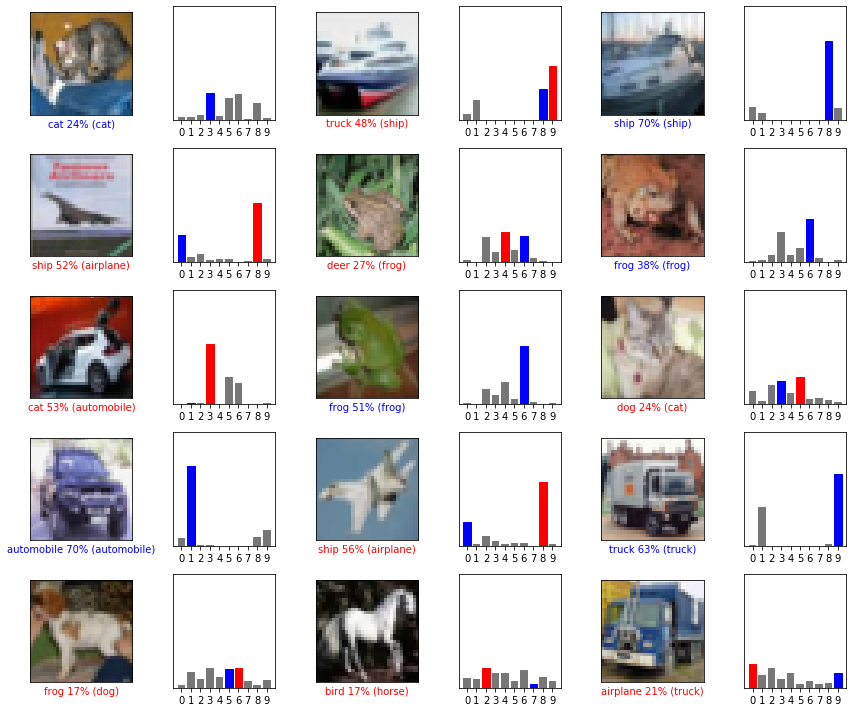

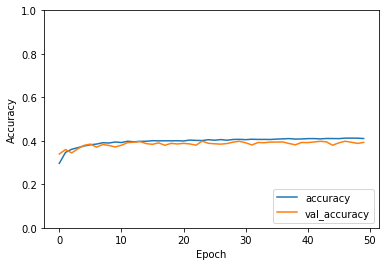

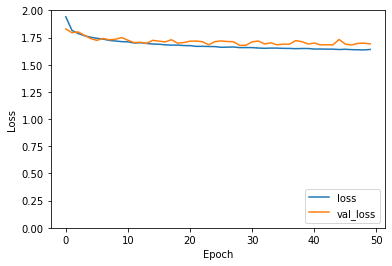

In [23]:
testModel1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 50)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                196672    
_________________________________________________________________
activation_49 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


Reusing TensorBoard on port 6006 (pid 13728), started 1:55:33 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.9803 - accuracy: 0.2801 - val_loss: 1.8975 - val_accuracy: 0.2956
Epoch 2/50
50000/50000 [==============================] - 7s 138us/sample - loss: 1.8853 - accuracy: 0.3216 - val_loss: 1.8742 - val_accuracy: 0.3340
Epoch 3/50
50000/50000 [==============================] - 7s 132us/sample - loss: 1.8570 - accuracy: 0.3293 - val_loss: 1.8227 - val_accuracy: 0.3445
Epoch 4/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.8425 - accuracy: 0.3403 - val_loss: 1.8623 - val_accuracy: 0.3240
Epoch 5/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.8342 - accuracy: 0.3424 - val_loss: 1.8391 - val_accuracy: 0.3343
Epoch 6/50
50000/50000 [==============================] - 7s 137us/sample - loss: 1.8230 - accuracy: 0.3468 - val_loss: 1.8116 - val_accuracy: 0.3581
Epoch 7/50
50000/50000 [==========================

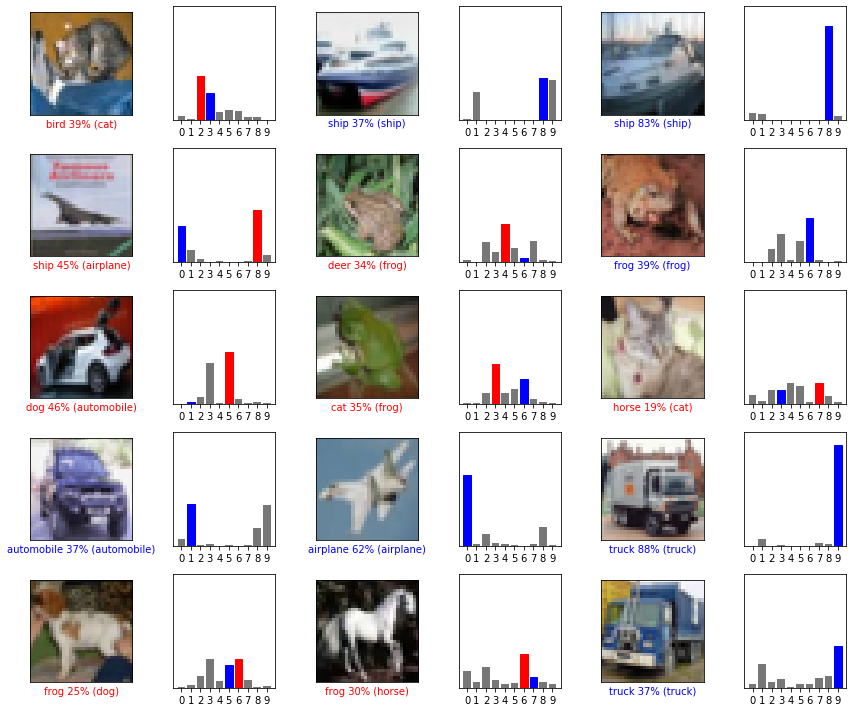

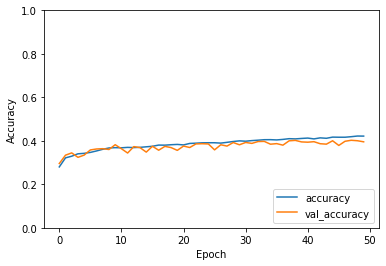

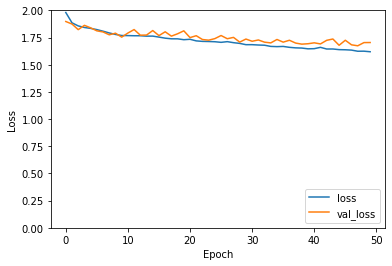

In [24]:
testModel2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 50)

### Adamax

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                196672    
_________________________________________________________________
activation_50 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


Reusing TensorBoard on port 6006 (pid 13728), started 2:01:19 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 147us/sample - loss: 1.9649 - accuracy: 0.2941 - val_loss: 1.8646 - val_accuracy: 0.3373
Epoch 2/50
50000/50000 [==============================] - 7s 147us/sample - loss: 1.8241 - accuracy: 0.3563 - val_loss: 1.8044 - val_accuracy: 0.3651
Epoch 3/50
50000/50000 [==============================] - 7s 133us/sample - loss: 1.7809 - accuracy: 0.3741 - val_loss: 1.7735 - val_accuracy: 0.3764
Epoch 4/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.7380 - accuracy: 0.3895 - val_loss: 1.7220 - val_accuracy: 0.3986
Epoch 5/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.7066 - accuracy: 0.4025 - val_loss: 1.6880 - val_accuracy: 0.4056
Epoch 6/50
50000/50000 [==============================] - 7s 141us/sample - loss: 1.6784 - accuracy: 0.4113 - val_loss: 1.7144 - val_accuracy: 0.3972
Epoch 7/50
50000/50000 [==========================

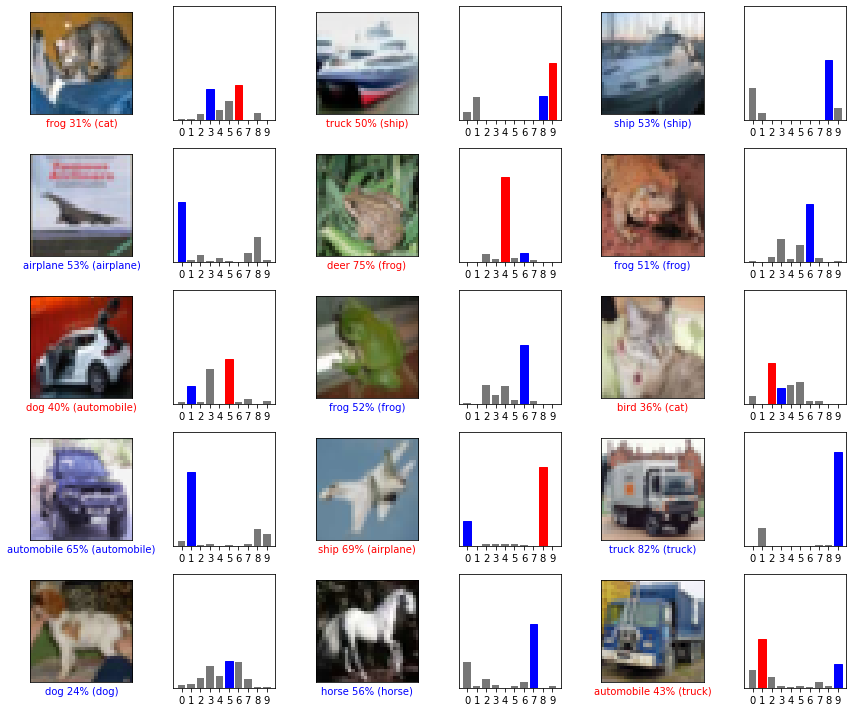

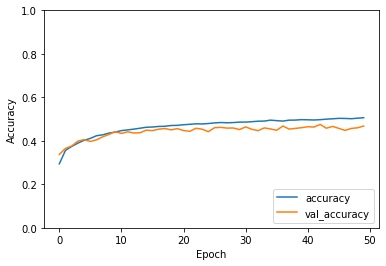

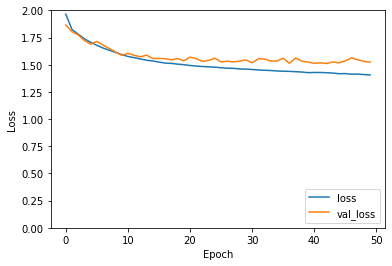

In [25]:
testModel3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 50)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                196672    
_________________________________________________________________
activation_51 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


Reusing TensorBoard on port 6006 (pid 13728), started 2:07:09 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 146us/sample - loss: 1.9133 - accuracy: 0.3180 - val_loss: 1.7823 - val_accuracy: 0.3701
Epoch 2/50
50000/50000 [==============================] - 7s 136us/sample - loss: 1.7352 - accuracy: 0.3835 - val_loss: 1.6906 - val_accuracy: 0.4024
Epoch 3/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.6663 - accuracy: 0.4104 - val_loss: 1.6504 - val_accuracy: 0.4131
Epoch 4/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.6203 - accuracy: 0.4278 - val_loss: 1.6399 - val_accuracy: 0.4184
Epoch 5/50
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5863 - accuracy: 0.4394 - val_loss: 1.6277 - val_accuracy: 0.4288
Epoch 6/50
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5591 - accuracy: 0.4469 - val_loss: 1.5810 - val_accuracy: 0.4405
Epoch 7/50
50000/50000 [==========================

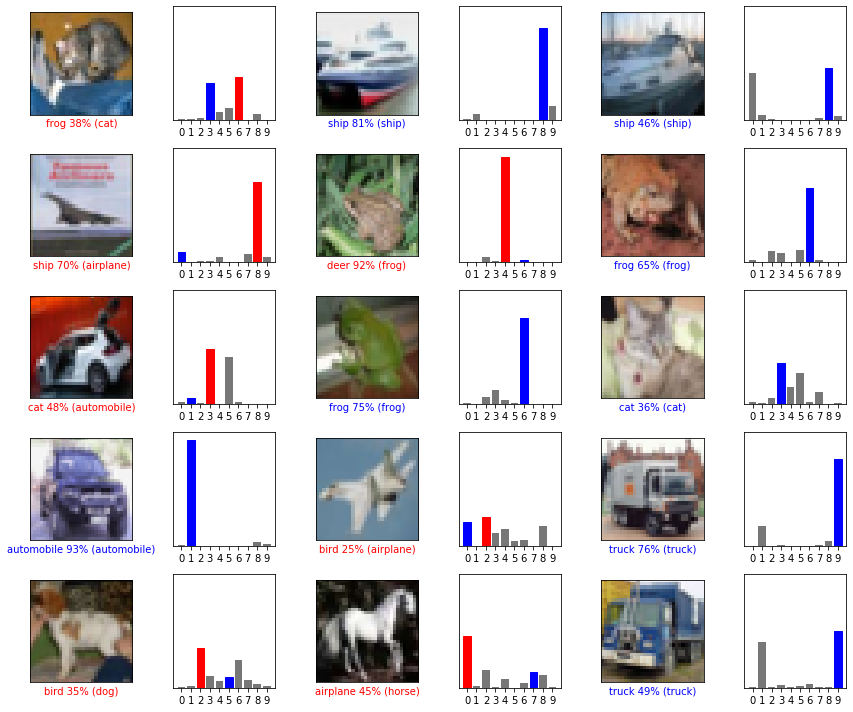

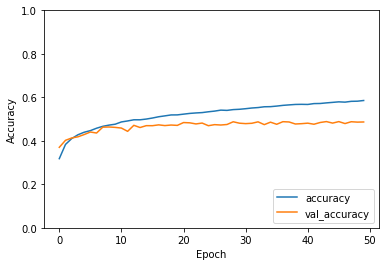

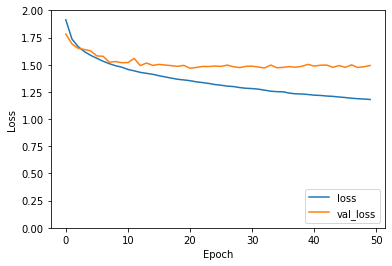

In [26]:
testModel4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 50)

### Batch + Dropout

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_52 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 2:27:23 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 277us/sample - loss: 1.7097 - accuracy: 0.3705 - val_loss: 1.5171 - val_accuracy: 0.4327
Epoch 2/50
50000/50000 [==============================] - 12s 247us/sample - loss: 1.4247 - accuracy: 0.4857 - val_loss: 1.5817 - val_accuracy: 0.4667
Epoch 3/50
50000/50000 [==============================] - 13s 267us/sample - loss: 1.2976 - accuracy: 0.5393 - val_loss: 1.1397 - val_accuracy: 0.5993
Epoch 4/50
50000/50000 [==============================] - 12s 246us/sample - loss: 1.2138 - accuracy: 0.5696 - val_loss: 1.6927 - val_accuracy: 0.4755
Epoch 5/50
50000/50000 [==============================] - 12s 246us/sample - loss: 1.1630 - accuracy: 0.5896 - val_loss: 1.0083 - val_accuracy: 0.6391
Epoch 6/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.1153 - accuracy: 0.6072 - val_loss: 1.0407 - val_accuracy: 0.6338
Epoch 7/50
50000/50000 [====================

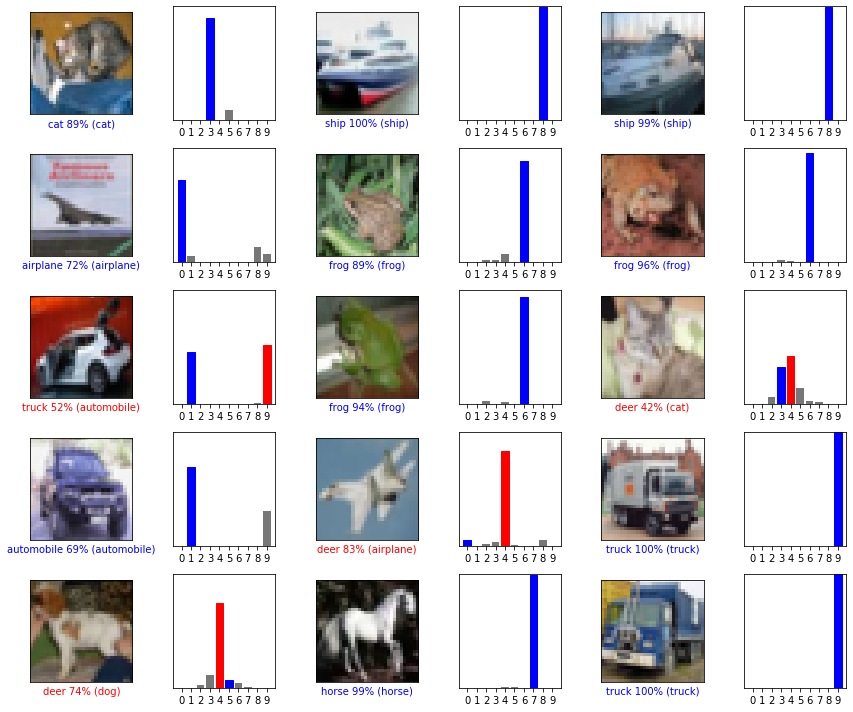

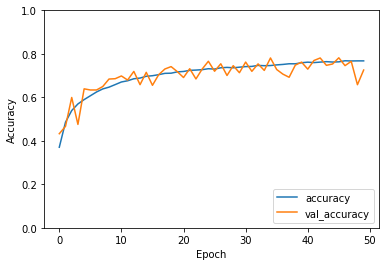

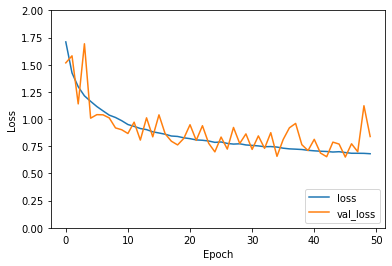

In [27]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdam(testModel4, 50)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_56 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 2:47:27 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 291us/sample - loss: 1.6642 - accuracy: 0.4124 - val_loss: 1.8789 - val_accuracy: 0.3415
Epoch 2/50
50000/50000 [==============================] - 13s 259us/sample - loss: 1.3841 - accuracy: 0.5122 - val_loss: 1.2767 - val_accuracy: 0.5314
Epoch 3/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.2959 - accuracy: 0.5443 - val_loss: 1.4047 - val_accuracy: 0.5019
Epoch 4/50
50000/50000 [==============================] - 12s 246us/sample - loss: 1.2390 - accuracy: 0.5705 - val_loss: 1.1393 - val_accuracy: 0.6000
Epoch 5/50
50000/50000 [==============================] - 12s 243us/sample - loss: 1.1988 - accuracy: 0.5852 - val_loss: 1.1830 - val_accuracy: 0.5840
Epoch 6/50
50000/50000 [==============================] - 12s 245us/sample - loss: 1.1667 - accuracy: 0.5958 - val_loss: 1.4281 - val_accuracy: 0.4779
Epoch 7/50
50000/50000 [====================

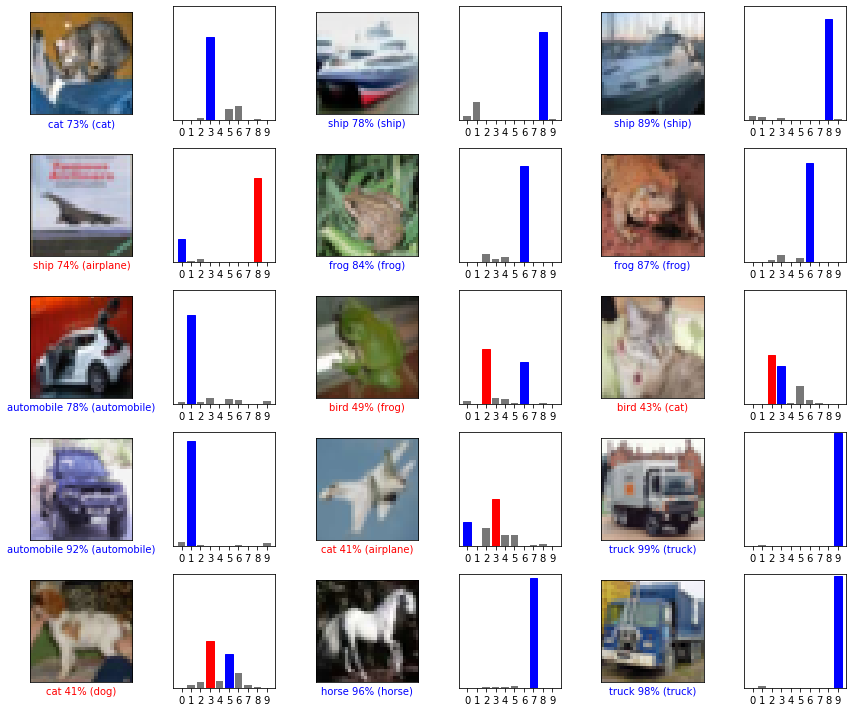

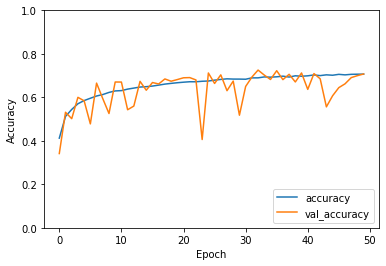

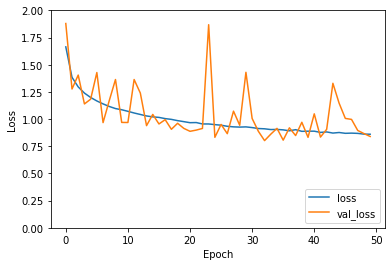

In [28]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdam(testModel4, 50)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_60 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 2:58:16 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 301us/sample - loss: 1.8209 - accuracy: 0.3286 - val_loss: 1.4831 - val_accuracy: 0.4588
Epoch 2/50
50000/50000 [==============================] - 13s 268us/sample - loss: 1.4827 - accuracy: 0.4655 - val_loss: 1.2787 - val_accuracy: 0.5141
Epoch 3/50
50000/50000 [==============================] - 13s 257us/sample - loss: 1.3395 - accuracy: 0.5249 - val_loss: 1.3528 - val_accuracy: 0.5087
Epoch 4/50
50000/50000 [==============================] - 13s 251us/sample - loss: 1.2497 - accuracy: 0.5596 - val_loss: 1.1225 - val_accuracy: 0.5869
Epoch 5/50
50000/50000 [==============================] - 13s 251us/sample - loss: 1.1831 - accuracy: 0.5838 - val_loss: 1.0368 - val_accuracy: 0.6265
Epoch 6/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.1332 - accuracy: 0.6066 - val_loss: 0.9416 - val_accuracy: 0.6611
Epoch 7/50
50000/50000 [====================

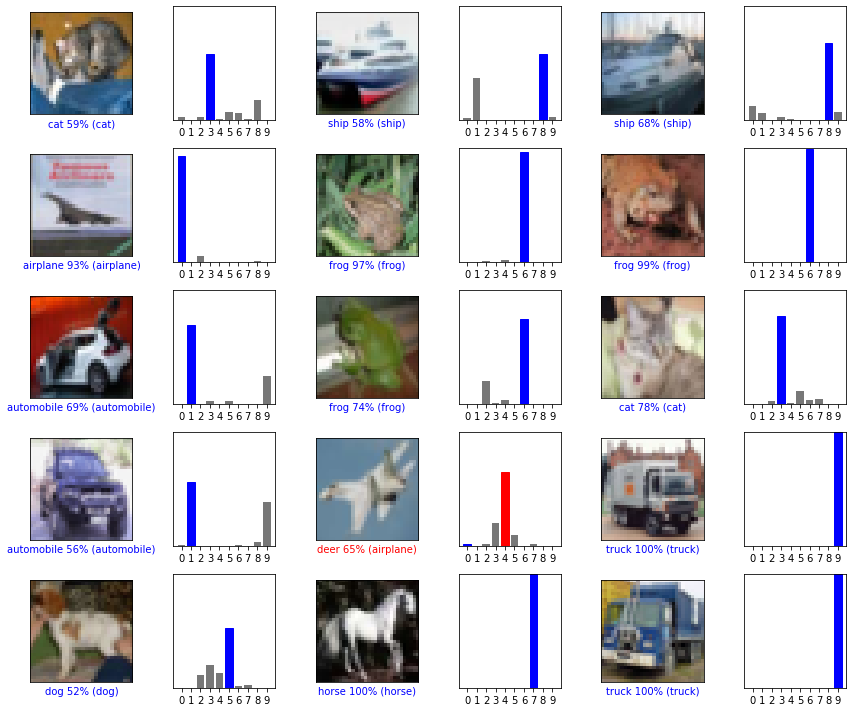

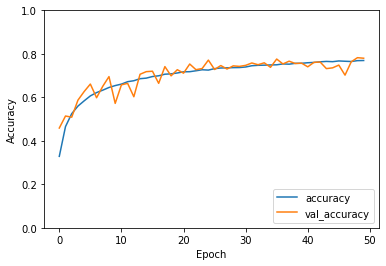

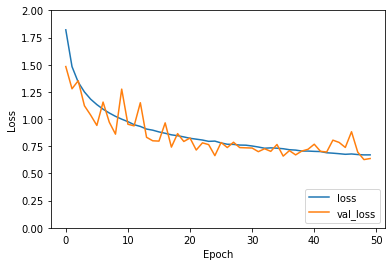

In [29]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 50)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_64 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 13, 13, 64)      

Reusing TensorBoard on port 6006 (pid 13728), started 3:09:16 ago. (Use '!kill 13728' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 278us/sample - loss: 1.7856 - accuracy: 0.3738 - val_loss: 1.6996 - val_accuracy: 0.3995
Epoch 2/50
50000/50000 [==============================] - 13s 264us/sample - loss: 1.4529 - accuracy: 0.4870 - val_loss: 1.3235 - val_accuracy: 0.5340
Epoch 3/50
50000/50000 [==============================] - 12s 243us/sample - loss: 1.3372 - accuracy: 0.5303 - val_loss: 1.4039 - val_accuracy: 0.5084
Epoch 4/50
50000/50000 [==============================] - 12s 242us/sample - loss: 1.2677 - accuracy: 0.5564 - val_loss: 1.4895 - val_accuracy: 0.4819
Epoch 5/50
50000/50000 [==============================] - 12s 234us/sample - loss: 1.2057 - accuracy: 0.5795 - val_loss: 1.1186 - val_accuracy: 0.6095
Epoch 6/50
50000/50000 [==============================] - 12s 243us/sample - loss: 1.1621 - accuracy: 0.5972 - val_loss: 1.2466 - val_accuracy: 0.5552
Epoch 7/50
50000/50000 [====================

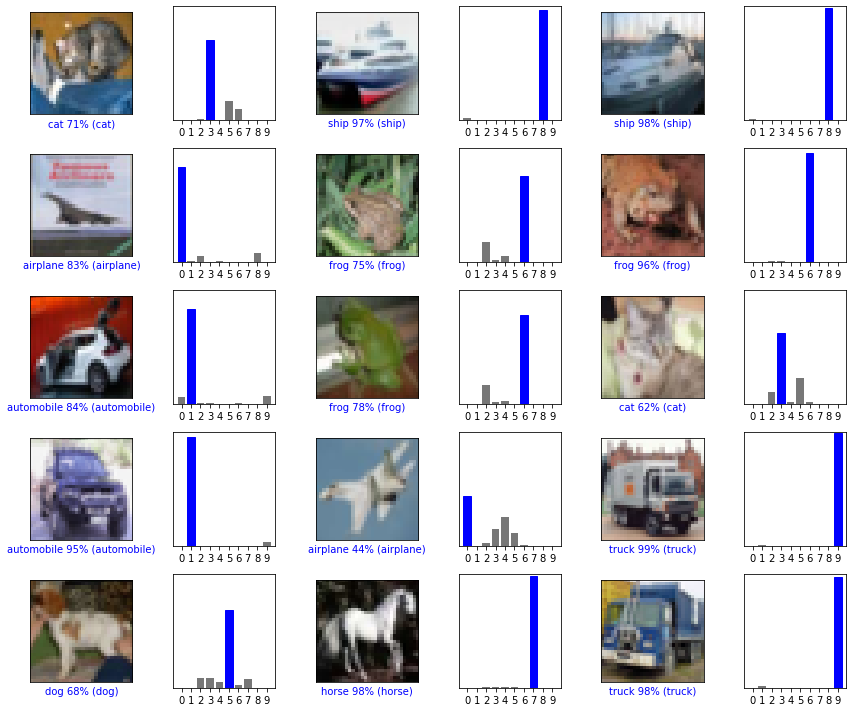

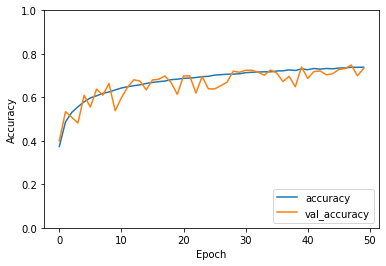

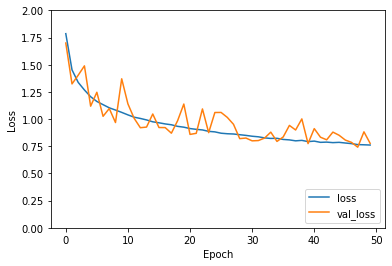

In [30]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 50)